# Diffusion flamelet z-resolution : Demo

The goal of this tutorial is to provide the user a way to understand and to test the resolution of counteflow-diffusion flames in the Z-space, as it will be explained later. The whys and wherefores of the method are explained before recalling basics about counterflow-diffusion flames. Eventually, the flamelet equations are given and an example of use is showed.

## 1. Introduction : Why such a method ?
For a long time now, scientists have tried to study numerical methods and improve the speed of their calculations. The goal of this modification was to resolve a counterflow-diffusion flame in the mixture fraction space rather than in the physical space.

Indeed, the resolution in the z-space enables the grid to be refined more naturally towards the flame front and therefore helps the calculation to converge. Furthermore, part of the work is done before simulating the flame, as we will guess a certain  χ  parameter, called a passive dissipation scalar. This is the only parameter representing the transport properties of the flame, which makes the job easier for the computer.

The main drawback of this method is that it supposes that the chemistry is infinitely fast, which is for some species not the case (it is possible to think about the formation of NOx for instance).

## 2. Basics about Counterflow-Diffusion Flames (CDF)

Counterflow Diffusion Flames (CDF) are often studied as they represent a commonly met configuration in combustion chambers. Contrary to premixed flames where fuel and oxidizer are mixed before burning, diffusion flames burn fuel and oxidizer while mixing. The dynamic of the flame is therefore not mastered by the same parameters.

Furthermore, to maintain the flame alive, it is necessary to stretch it (otherwise, the reaction rate decreases as  1t√  with t being the time). The strain rate is defined as follows :

$$a= \frac{u_F+u_O}{L}$$
 
with  $u_F$  the velocity of the fuel,  $u_O$  the velocity of the oxidizer and L the length between the two ducts. The unit is in  $s^{−1}$  and it represented the way the two reactants are pushed together. The higher this number is, the greater the flame is strained.

To characterize the flame, two equivalence ratios are often defined, namely the global equivalence ratio :

$$ \phi_{glob} = s \frac{Y_f^0 \dot{m_1}}{Y_o^0 \dot{m_2}} $$ 
 
with  $ s = \frac{\nu_o W_o}{\nu_f W_f}$ ,  $\nu_f$  and  $\nu_o$  being the stochiometric coefficient of the fuel and the oxidizer,  $W_f$  and  $W_o$  being the molar masses of the fuel and the oxidizer,  $Y_f^0$  and  $Y_o^0$  being the mass fractions of the fuel and the oxidizer and  $\dot{m_1}$  and  \dot{m_2}  being the mass flow rates of the fuel and oxidizer streams.

and the local equivalence ratio :

$$ \phi_{loc} = s \frac{Y_f^0}{Y_o^0} \frac{z}{1-z}$$ 
 
with $z$ the normalized passive scalar constructed thanks to the conservation equations. This variable respects the following equation :

$$ \frac{\partial \rho z}{\partial t} + \frac{\partial}{\partial x_i} (\rho u_i z) = \frac{\partial}{\partial x_i} (\rho D \frac{z}{x_i}) $$
 
with $D$ the diffusive coefficient,  $x_i$  the different directions and  $u_i$  the velocity associated to it

and takes the following expression :

$$ z= \frac{s Y_f − Y_o + Y^0_o}{s Y^0_f+Y^0_o} $$
 
$z$ is 1 when there is only fuel in the mix and 0 when there is just the oxidizer. This variable is often called the mixing fraction and this is what will be used in the following equations.

## 3. Flamelet equations
Assuming unity Lewis number of the mixture fraction  $Le_z$ , a constant Lewis number for every species  $Le_i$ , no radiating heat loss and negligible Soret effect, the equations can be written as :

$$ \rho \frac{\partial  Y_i}{\partial t} = \frac{\rho \chi}{2 Le_i} \frac{\partial^2 Y_i}{\partial z^2} + \frac{1}{4} (\frac{1}{Le_i} -1 ) \left( \frac{\partial \rho \chi}{\partial z} + \rho \chi \frac{c_p}{\lambda} \frac{\partial}{\partial z} (\frac{\lambda}{c_p})  \right) \frac{\partial Y_i}{\partial Z} + \dot{\omega_i}$$

$$ \rho \frac{\partial T}{\partial t} = \frac{\rho \chi}{2} \frac{\partial^2 T}{\partial z^2} + \frac{\rho \chi}{2 c_p} \frac{\partial c_p}{\partial z} \frac{\partial T}{\partial z} + \frac{\rho \chi}{2 c_p} \sum^N_{i=1} \left( \frac{c_{p,i}}{Le_i} \frac{\partial  Y_i}{\partial z} \right) \frac{\partial T}{\partial z} - \frac{1}{c_p} \sum^N_{i=1} h_i \dot{\omega_i}$$
 
with $\rho$  the density,  $Y_i$  the mass fraction of the i-th species, $T$ the temperature, $c_p$ the pressure coefficient of the mix,  $\lambda$  the heat conduction,  $c_{p,i}$  the specific heat of the i-th species,  $\dot{\omega_i}$  the net production rate of the i-th species and  $h_i$  the enthalpy of the i-th species.

$\chi$ is defined as the scalar dissipation rate of which the expression is the following for a one dimensional strained flame :

$$ \chi= 2 D_z \left(\frac{\partial z}{\partial x_1}\right)^2 $$
 
And the solution for $z$ is known for such a case, therefore the dissipation rate takes the following expression :

$$ \chi = a \pi \exp(−2[erf^{−1}(1−2z)]^2) $$

## 4. Example of use
Here, the code will be tested on a methane/oxygen mix with the following parameters :
- P=101325  Pa
- T=300  K
- $\phi$ =1 

The mechanism used is the skeletal from Lu, avaiblable on http://chemistry.cerfacs.fr


In [3]:
import cantera as ct
import time
import numpy as np
from scipy.special import erfinv, erfcinv, erf
import matplotlib.pyplot as plt

### 4.1 Gas initialization

Some important parameters are initialized. You should note that the mass flow rates have been chosen arbitrarily.

In [4]:
T = 300.0                                 # temperature
P = 101325.0                              # pressure

rho_o = P / (8.314 / 0.032 * T)           # oxidizer density
tin_o = 300.0                             # oxidizer inlet temperature
mdot_o = 0.8                              # kg/m^2/s
comp_o = 'O2:1'                           # oxidizer composition
u_o = mdot_o / rho_o                      # oxidizer speed

rho_f = P / (8.314 / 0.016 * T)           # fuel density
tin_f = 300.0                             # fuel inlet temperature
mdot_f = 0.2                              # kg/m^2/s
comp_f = 'CH4:1'                          # fuel composition
u_f = mdot_f / rho_f                      # fuel speed

width = 1.0                               # width
SR = (u_o + u_f) / (width)                # strain rate

gas_1 = ct.Solution('Lu.yaml')
gas_1.TP = T, P

### 4.2 Flamelet creation

Here, the flamelet object is created. The scalar dissipation rate at stochiometry must be provided to the code to have an initialization of the solution. In the expression of $\chi$ here, $z$ is calculated at the stochiometry but the strain rate SR is only the mean strain rate (therefore lower that at stochiometry). If the calculation does not run, it is therefore advise to go for a trial and error approach by increasing this value. Here, a graph showing the initialization of the temperature profile is shown below this code box. As for the usual calculation, a linear profile is created, with here a peak being at  $z = $ 0.2 as it is the value of the mixing fraction at $\phi$=1.

In [5]:
plt.rcParams['figure.figsize'] = (14, 10)

initial_grid = np.linspace(0,width,11)                      # initial grid for the calculation

f_1 = ct.Flamelet(gas_1, initial_grid)                      # Flamelet object creation

f_1.fuel_inlet.mdot = mdot_f                                # Fuel inlet conditions
f_1.fuel_inlet.Y = comp_f
f_1.fuel_inlet.T = tin_f
                                                            # Oxidizer inlet conditions
f_1.oxidizer_inlet.mdot = mdot_o
f_1.oxidizer_inlet.Y = comp_o
f_1.oxidizer_inlet.T = tin_o

f_1.ChiSt = SR/np.pi*(np.exp(-2*((erfinv(1-2*0.2))**2)))    # Stochiometric scalar dissipation rate

f_1.set_initial_guess()

plt.plot(f_1.flame.grid, f_1.T)
plt.xlabel('Position [m]', fontsize=15)
plt.ylabel('Temperature [K]', fontsize=15)

Text(0, 0.5, 'Temperature [K]')

### 4.3 Solving the flamelet equations¶

The flamelet equations are resolved here. The flame is saved and the heat release is calculated. A few results are then ploted to see the coherence.

In [6]:
# Calculation properties

loglevel = 1
f_1.set_max_jac_age(1, 1)
f_1.set_time_step(1.e-9, [100, 100, 100])
f_1.energy_enabled = True
f_1.set_refine_criteria(ratio=4, slope=0.1, curve=0.1)

# Solver
t1_A = time.time()
f_1.solve(loglevel, refine_grid = 'refine')
t1_B = time.time()
f_1.save('CH4-O2-converged-flamelet-ARC.csv')

# Calculation of the heat release
hr_1 = -np.sum(f_1.standard_enthalpies_RT * f_1.net_production_rates, 0) * ct.gas_constant * f_1.T


..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 100 timesteps     1.709e-08      8.311
Attempt Newton solution of steady-state problem...    failure. 
Take 100 timesteps     1.297e-07      7.615
Attempt Newton solution of steady-state problem...    failure. 
Take 100 timesteps     2.217e-06      5.761
Attempt Newton solution of steady-state problem...    failure. 
Take 100 timesteps     3.788e-05      4.608
Attempt Newton solution of steady-state problem...    failure. 
Take 100 timesteps      0.003276       3.07
Attempt Newton solution of steady-state problem...    failure. 
Take 100 timesteps       0.01659      1.894
Attempt Newton solution of steady-state problem...    failure. 
Take 100 timesteps         942.3      -5.26
Attempt Newton solution of steady-state problem...    success.

Problem solved on [11] point grid(s).

.............................................................

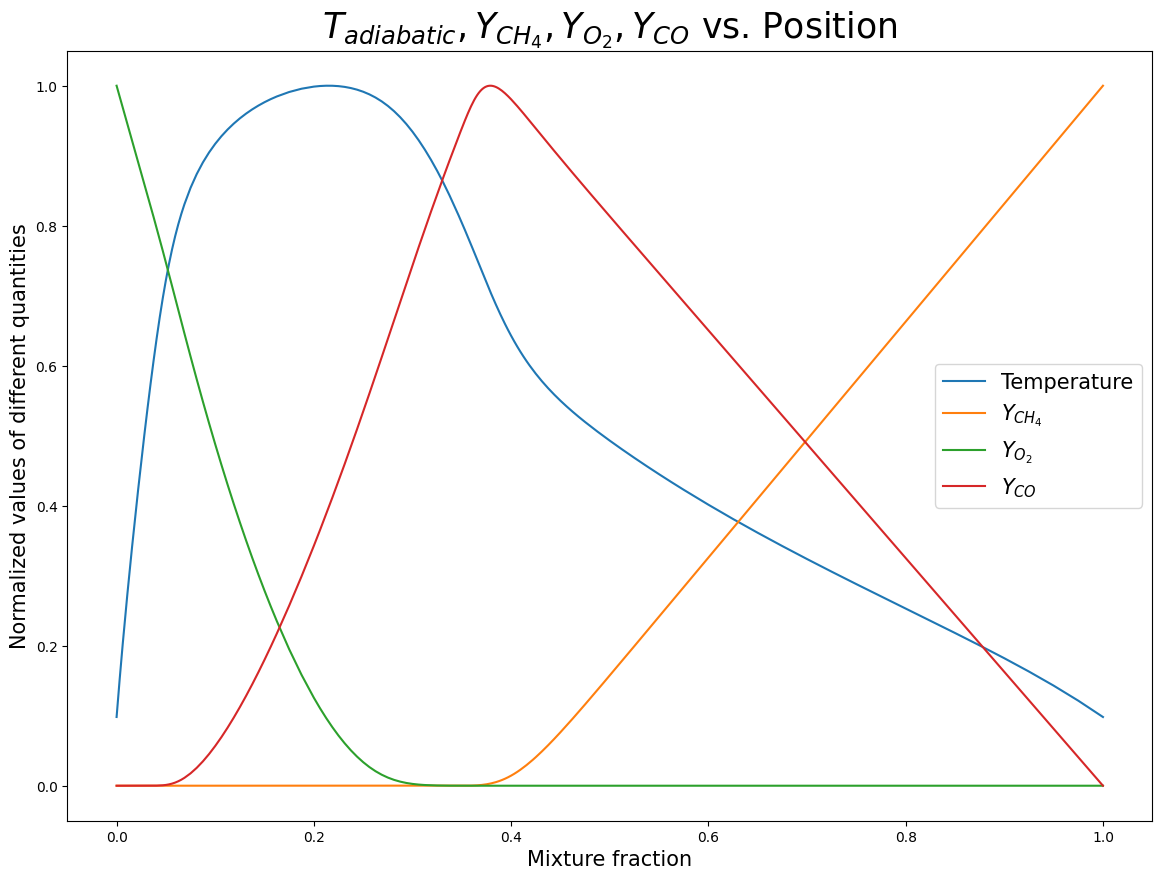

In [9]:
plt.rcParams['figure.figsize'] = (14, 10)

# Get interesting indices for computation of species
fuel_species = 'CH4'
ifuel = gas_1.species_index(fuel_species)
io2 = gas_1.species_index('O2')
ico = gas_1.species_index('CO')

# Initiate interesting vectors
ch4_1 = np.zeros(f_1.flame.n_points,'d')
o2_1 = np.zeros(f_1.flame.n_points,'d')
co_1 = np.zeros(f_1.flame.n_points,'d')

# Computes interesting quantities for analyzing a counter-flow flame
for n in range(f_1.flame.n_points):
    f_1.set_gas_state(n)
    ch4_1[n]= gas_1.Y[ifuel]
    o2_1[n]= gas_1.Y[io2]
    co_1[n]= gas_1.Y[ico]
T_1 = f_1.T
    
plt.plot(f_1.flame.grid,T_1/np.max(T_1),f_1.flame.grid,ch4_1/np.max(ch4_1),
         f_1.flame.grid,o2_1/np.max(o2_1),f_1.flame.grid,co_1/np.max(co_1))
plt.title(r'$T_{adiabatic}, Y_{CH_4},  Y_{O_2}, Y_{CO}$ vs. Position',fontsize=25)
plt.xlabel(r'Mixture fraction', fontsize=15)
plt.ylabel('Normalized values of different quantities',fontsize=15)
plt.legend(['Temperature','$Y_{CH_4}$', '$Y_{O_2}$', '$Y_{CO}$'],fontsize=15)

## 5. Running the "official" CDF method

### 5.1 Gas initialization

In [10]:
T = 300.0                                 # temperature
P = 101325.0                              # pressure

rho_o = P / (8.314 / 0.032 * T)           # oxidizer density
tin_o = 300.0                             # oxidizer inlet temperature
mdot_o = 0.8                              # kg/m^2/s
comp_o = 'O2:1'                           # oxidizer composition
u_o = mdot_o / rho_o                      # oxidizer speed

rho_f = P / (8.314 / 0.016 * T)           # fuel density
tin_f = 300.0                             # fuel inlet temperature
mdot_f = 0.2                              # kg/m^2/s
comp_f = 'CH4:1'                          # fuel composition
u_f = mdot_f / rho_f                      # fuel speed

width = 1.0                               # width
SR = (u_o + u_f) / (width)                # strain rate

gas_2 = ct.Solution('Lu.yaml')
gas_2.TP = T, P

In [11]:
plt.rcParams['figure.figsize'] = (14, 10)

initial_grid = np.linspace(0,width,11)                      # initial grid for the calculation

f_2 = ct.CounterflowDiffusionFlame(gas_2, initial_grid)     # Counterflow diffusion flame object creation

f_2.fuel_inlet.mdot = mdot_f                                # Fuel inlet conditions
f_2.fuel_inlet.Y = comp_f
f_2.fuel_inlet.T = tin_f
                                                            # Oxidizer inlet conditions
f_2.oxidizer_inlet.mdot = mdot_o
f_2.oxidizer_inlet.Y = comp_o
f_2.oxidizer_inlet.T = tin_o

f_2.set_initial_guess()

plt.plot(f_2.flame.grid, f_2.T)
plt.xlabel('Position [m]', fontsize=15)
plt.ylabel('Temperature [K]', fontsize=15)

Text(0, 0.5, 'Temperature [K]')

### 5.3 Solving the counterflow-diffusion flame equations

In [13]:
# Calculation properties

loglevel = 1
f_2.set_max_jac_age(1, 1)
f_2.set_time_step(5.e-8, [10, 20, 80])
f_2.energy_enabled = True
f_2.set_refine_criteria(ratio=4, slope=0.1, curve=0.1)

# Solver
t2_A = time.time()
f_2.solve(loglevel, refine_grid = 'refine')
t2_B = time.time()
f_2.save('CH4-O2-converged-cf-ARC.csv')

# Calculation of the heat release
hr_2 = -np.sum(f_2.standard_enthalpies_RT * f_2.net_production_rates, 0) * ct.gas_constant * f_2.T


..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [199] point grid(s).

..............................................................................
no new points needed in flame


CanteraError: 
*******************************************************************************
CanteraError thrown by SolutionArray::writeEntry:
File 'CH4-O2-converged-cf-ARC.csv' already exists; use option 'overwrite' to replace CSV file.
*******************************************************************************


In [16]:
plt.rcParams['figure.figsize'] = (14, 10)

# Get interesting indices for computation of species
fuel_species = 'CH4'
ifuel = gas_2.species_index(fuel_species)
io2 = gas_2.species_index('O2')
ico = gas_2.species_index('CO')

# Initiate interesting vectors
ch4_2 = np.zeros(f_2.flame.n_points,'d')
o2_2 = np.zeros(f_2.flame.n_points,'d')
co_2 = np.zeros(f_2.flame.n_points,'d')

# Computes interesting quantities for analyzing a counter-flow flame
for n in range(f_2.flame.n_points):
    f_2.set_gas_state(n)
    ch4_2[n]= gas_2.Y[ifuel]
    o2_2[n]= gas_2.Y[io2]
    co_2[n]= gas_2.Y[ico]
T_2 = f_2.T
    
plt.plot(f_2.flame.grid,T_2/np.max(T_2),f_2.flame.grid,ch4_2/np.max(ch4_2),
         f_2.flame.grid,o2_2/np.max(o2_2),f_2.flame.grid,co_2/np.max(co_2))
plt.title(r'$T_{adiabatic}, Y_{CH_4},  Y_{O_2}, Y_{CO}$ vs. Position',fontsize=25)
plt.xlabel(r'Physical space [m]', fontsize=15)
plt.ylabel('Normalized values of different quantities',fontsize=15)
plt.xlim([0.2, 0.4])
plt.legend(['Temperature','$Y_{CH_4}$', '$Y_{O_2}$', '$Y_{CO}$'],fontsize=15)

## 6. Comparison with the between the two methods

### Calculation time

In [17]:
print('Time taken by the flamelet method :', t1_B-t1_A, ' s')
print('Time taken by the CDF method      :', t2_B-t2_A, ' s')

Time taken by the flamelet method : 34.48302745819092  s
Time taken by the CDF method      : 0.44052815437316895  s


#### Profiles

- : flamelet method, -- : cantera default method


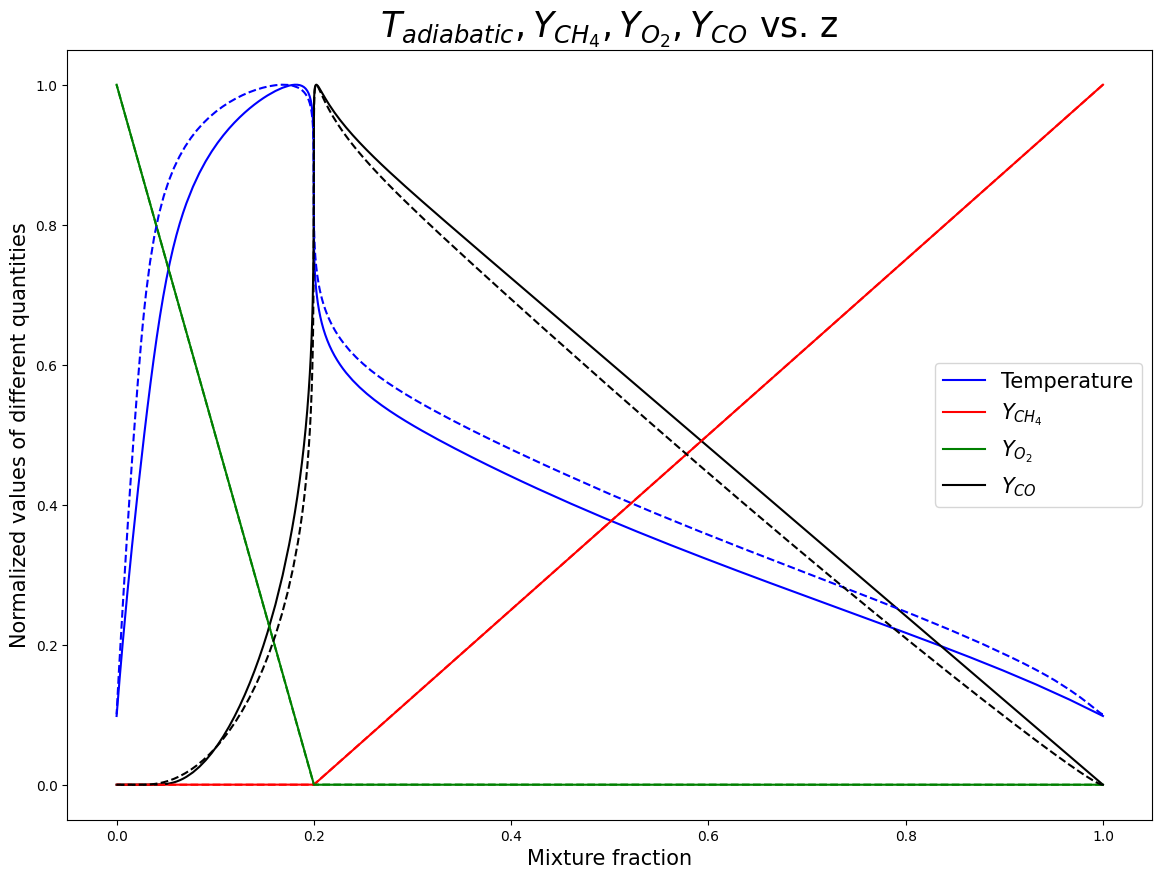

In [18]:
mass_st_ratio = 4 # stoechiometric combustion CH4/O2

Z_1 = (mass_st_ratio*f_1.Y[gas_1.species_index('CH4')]-f_1.Y[gas_1.species_index('O2')]+1)/(mass_st_ratio*1+1)
Z_2 = (mass_st_ratio*f_2.Y[gas_2.species_index('CH4')]-f_2.Y[gas_2.species_index('O2')]+1)/(mass_st_ratio*1+1)

plt.plot(Z_1,T_1/np.max(T_1),'b-', Z_1,ch4_1/np.max(ch4_1),'r-',
         Z_1,o2_1/np.max(o2_1),'g-', Z_1,co_1/np.max(co_1),'k-')
plt.plot(Z_2,T_2/np.max(T_2),'b--',Z_2,ch4_2/np.max(ch4_2),'r--',
         Z_2,o2_2/np.max(o2_2),'g--',Z_2,co_2/np.max(co_2),'k--')
plt.title(r'$T_{adiabatic}, Y_{CH_4},  Y_{O_2}, Y_{CO}$ vs. z',fontsize=25)
plt.xlabel(r'Mixture fraction', fontsize=15)
plt.ylabel('Normalized values of different quantities',fontsize=15)
plt.legend(['Temperature','$Y_{CH_4}$', '$Y_{O_2}$', '$Y_{CO}$'],fontsize=15)

print('- : flamelet method, -- : cantera default method')